### LG 실습교육 (OR Tools & Python)    

#### 1. 예제 문제 풀이 - 선형계획법    

- 선형계획법 예시 문제    
$$
maximize\ 3x+y \\
subject\ to. \ 0 \leq x \leq 1 \\
\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ 0\leq y \leq 2 \\
\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ x+y \leq  2 \\
$$     

- OR Tools를 활용한 풀이 순서      
    1. 라이브러리 호출    
    2. 솔버 선언    
    3. 변수 생성    
    4. 제약조건 정의     
    5. 목적함수 정의    
    6. 솔버 호출        
    7. 결과 표시   

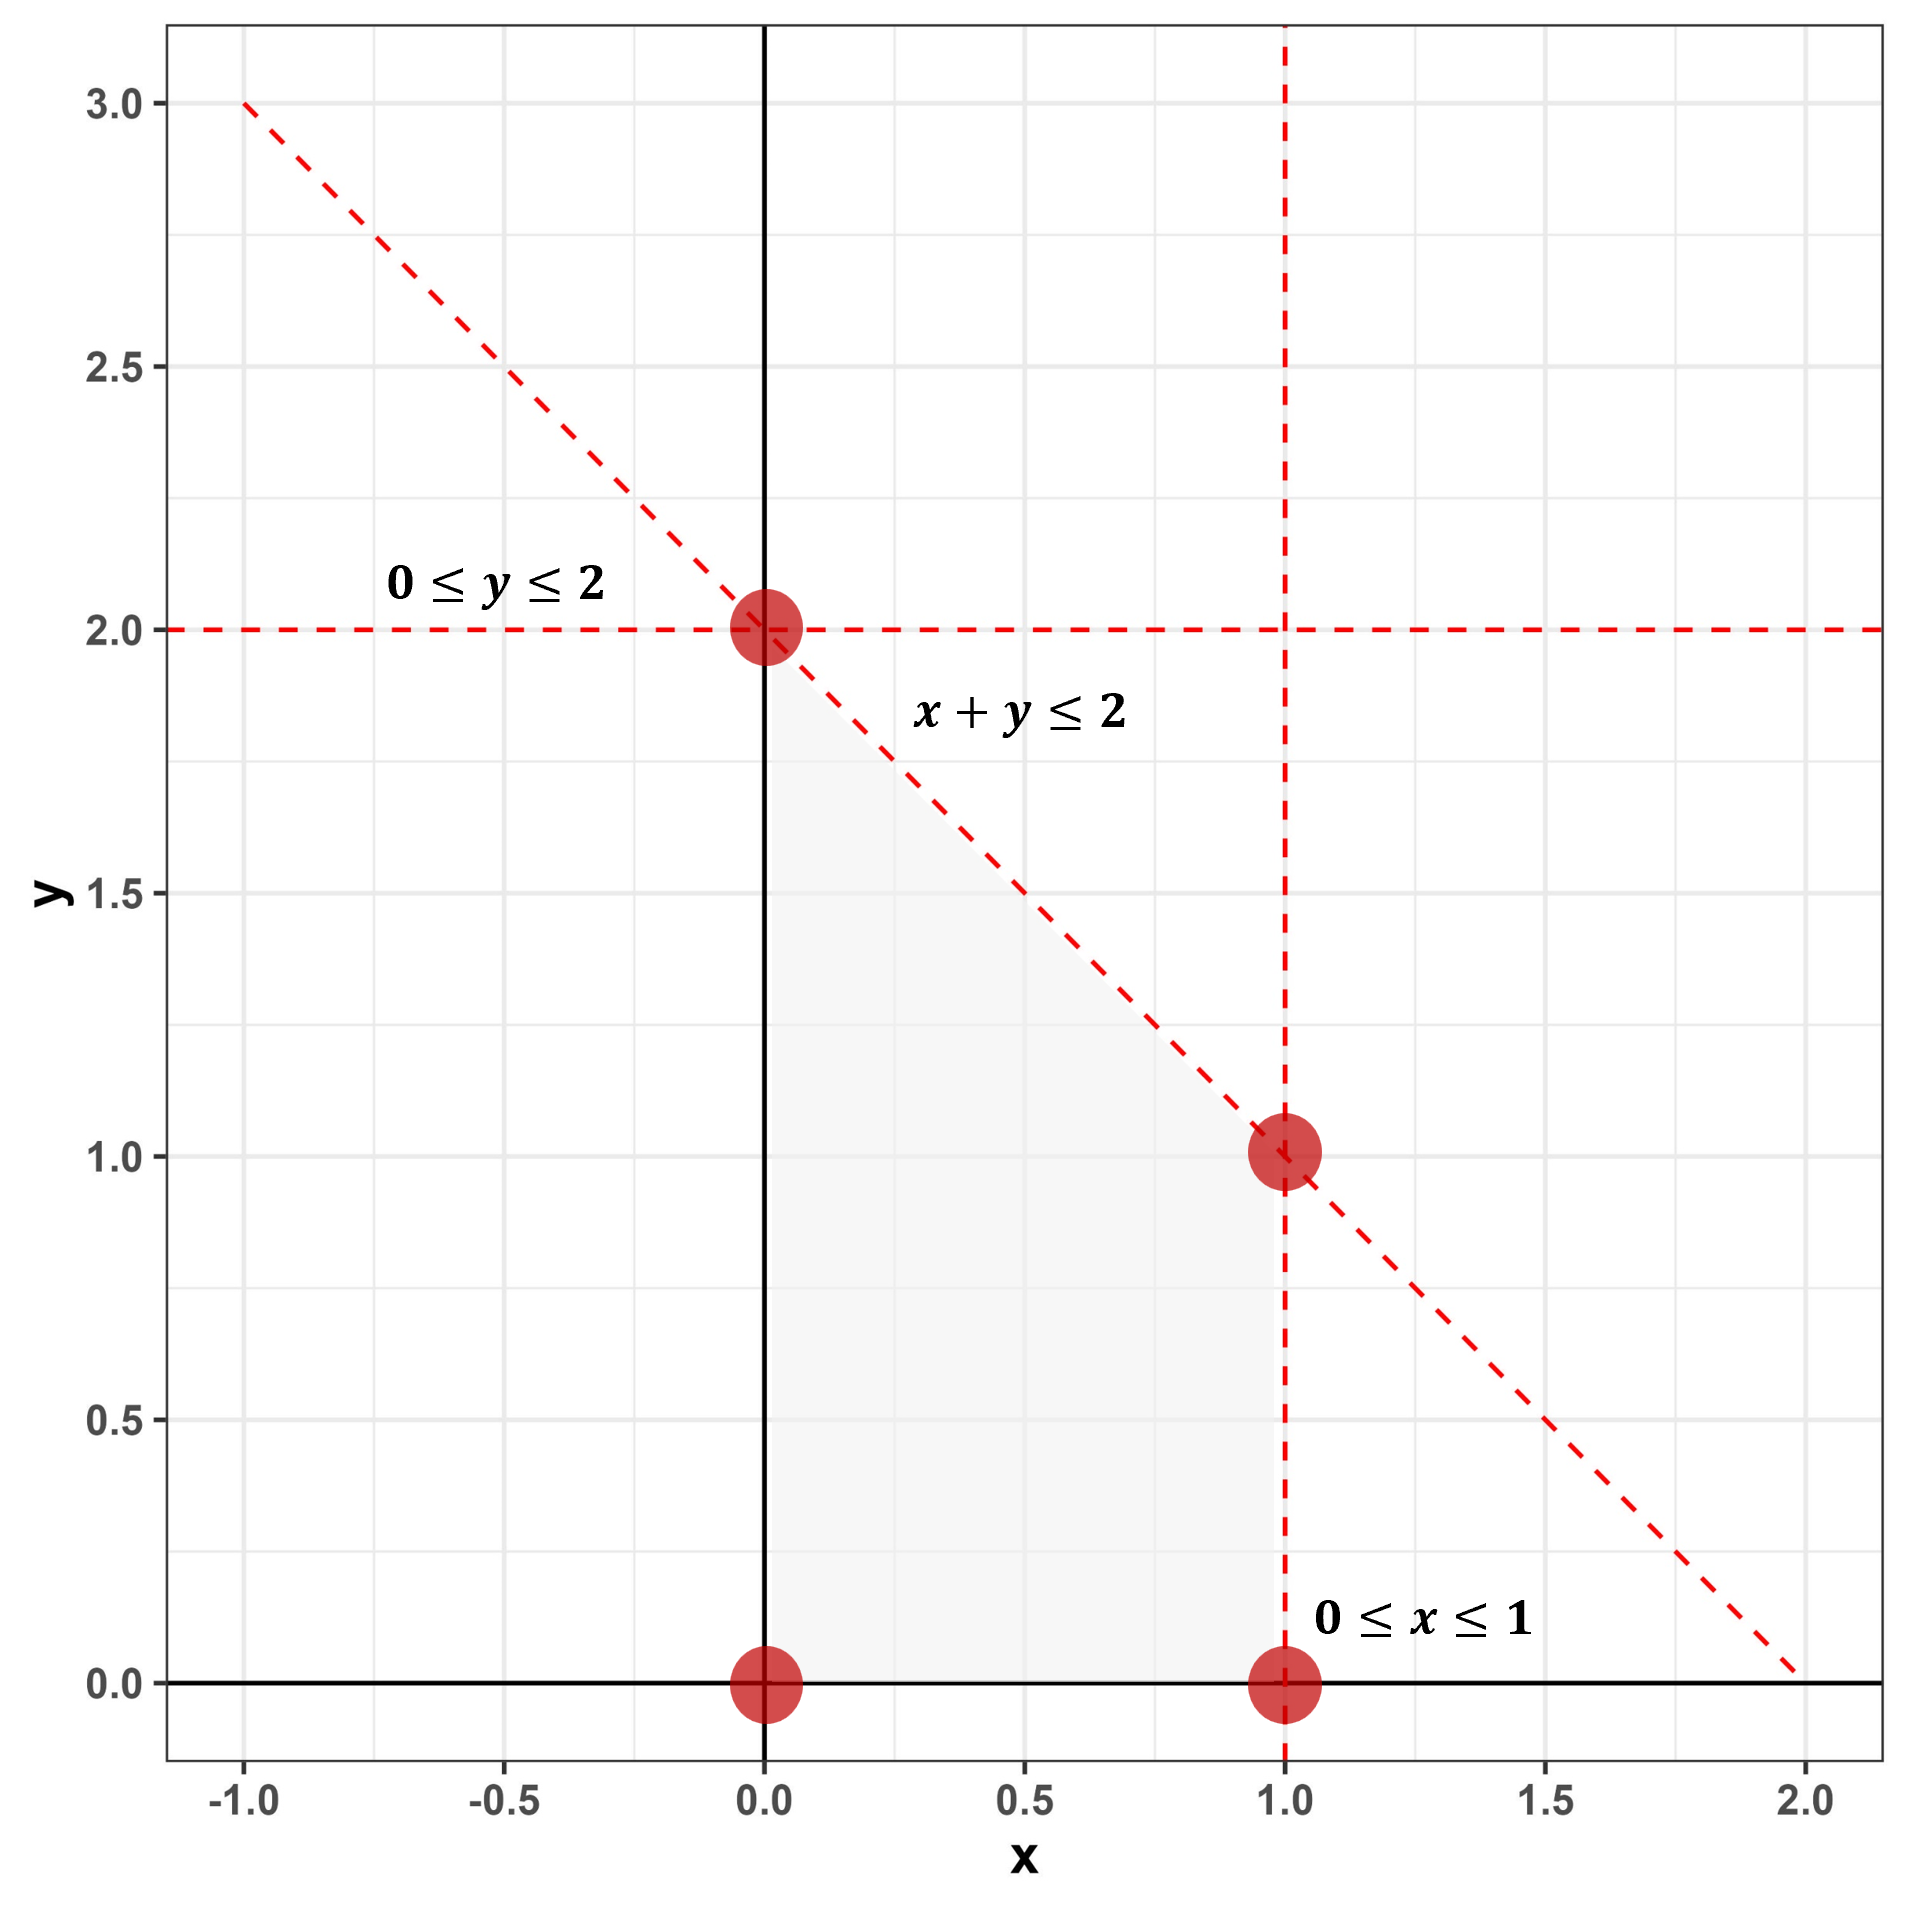

In [1]:
from IPython.display import Image
Image(filename="D:\\Dropbox\\1. 학교과제\\2023년\\LG 실습교육\\Material\\Figure 1.png", width = 500, height = 500)

##### 1.1 패키지 불러오기  
- 패키지명: ortools       

In [3]:
from ortools.linear_solver import pywraplp
from ortools.init import pywrapinit

- pywraplp는 기본 C++솔버를 위한 Python 래퍼    

##### 1.2 Solver 선언     
- 솔버: GLOP (GLOP: 선형 솔버)

In [3]:
# Create the linear solver with the GLOP backend.
solver = pywraplp.Solver.CreateSolver('GLOP')
solver

<ortools.linear_solver.pywraplp.Solver; proxy of <Swig Object of type 'operations_research::MPSolver *' at 0x000002BDBBA85390> >

##### 1.3 변수 생성      
$$
x:0 \leq x \leq 1 \\
y:0 \leq y \leq 2
$$

In [4]:
x = solver.NumVar(0, 1, 'x')
y = solver.NumVar(0, 2, 'y')

##### 1.4 제약조건 생성     

$$
subject\ to. \ x+y \leq 2
$$

In [5]:
ct = solver.Constraint(0, 2, 'ct')
ct.SetCoefficient(x, 1)
ct.SetCoefficient(y, 1)

##### 1.5 목표 함수 정의    

In [6]:
objective = solver.Objective()
objective.SetCoefficient(x, 3)
objective.SetCoefficient(y, 1)
objective.SetMaximization()

##### 1.6 솔버 호출     

In [7]:
solver.Solve()
print('Solution:')
print('Objective value =', objective.Value())
print('x =', x.solution_value())
print('y =', y.solution_value())

Solution:
Objective value = 4.0
x = 1.0
y = 1.0


#### 2. 예제 문제 풀이 - 혼합정수계획법    

- 혼합정수계획법 예시 문제    
$$
maximize\ x+10y \\
subject\ to. \ x + 7y \leq 17.5 \\
\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ 0\leq x \leq 3.5 \\
\ \ \ \ \  0\leq y \\
$$     

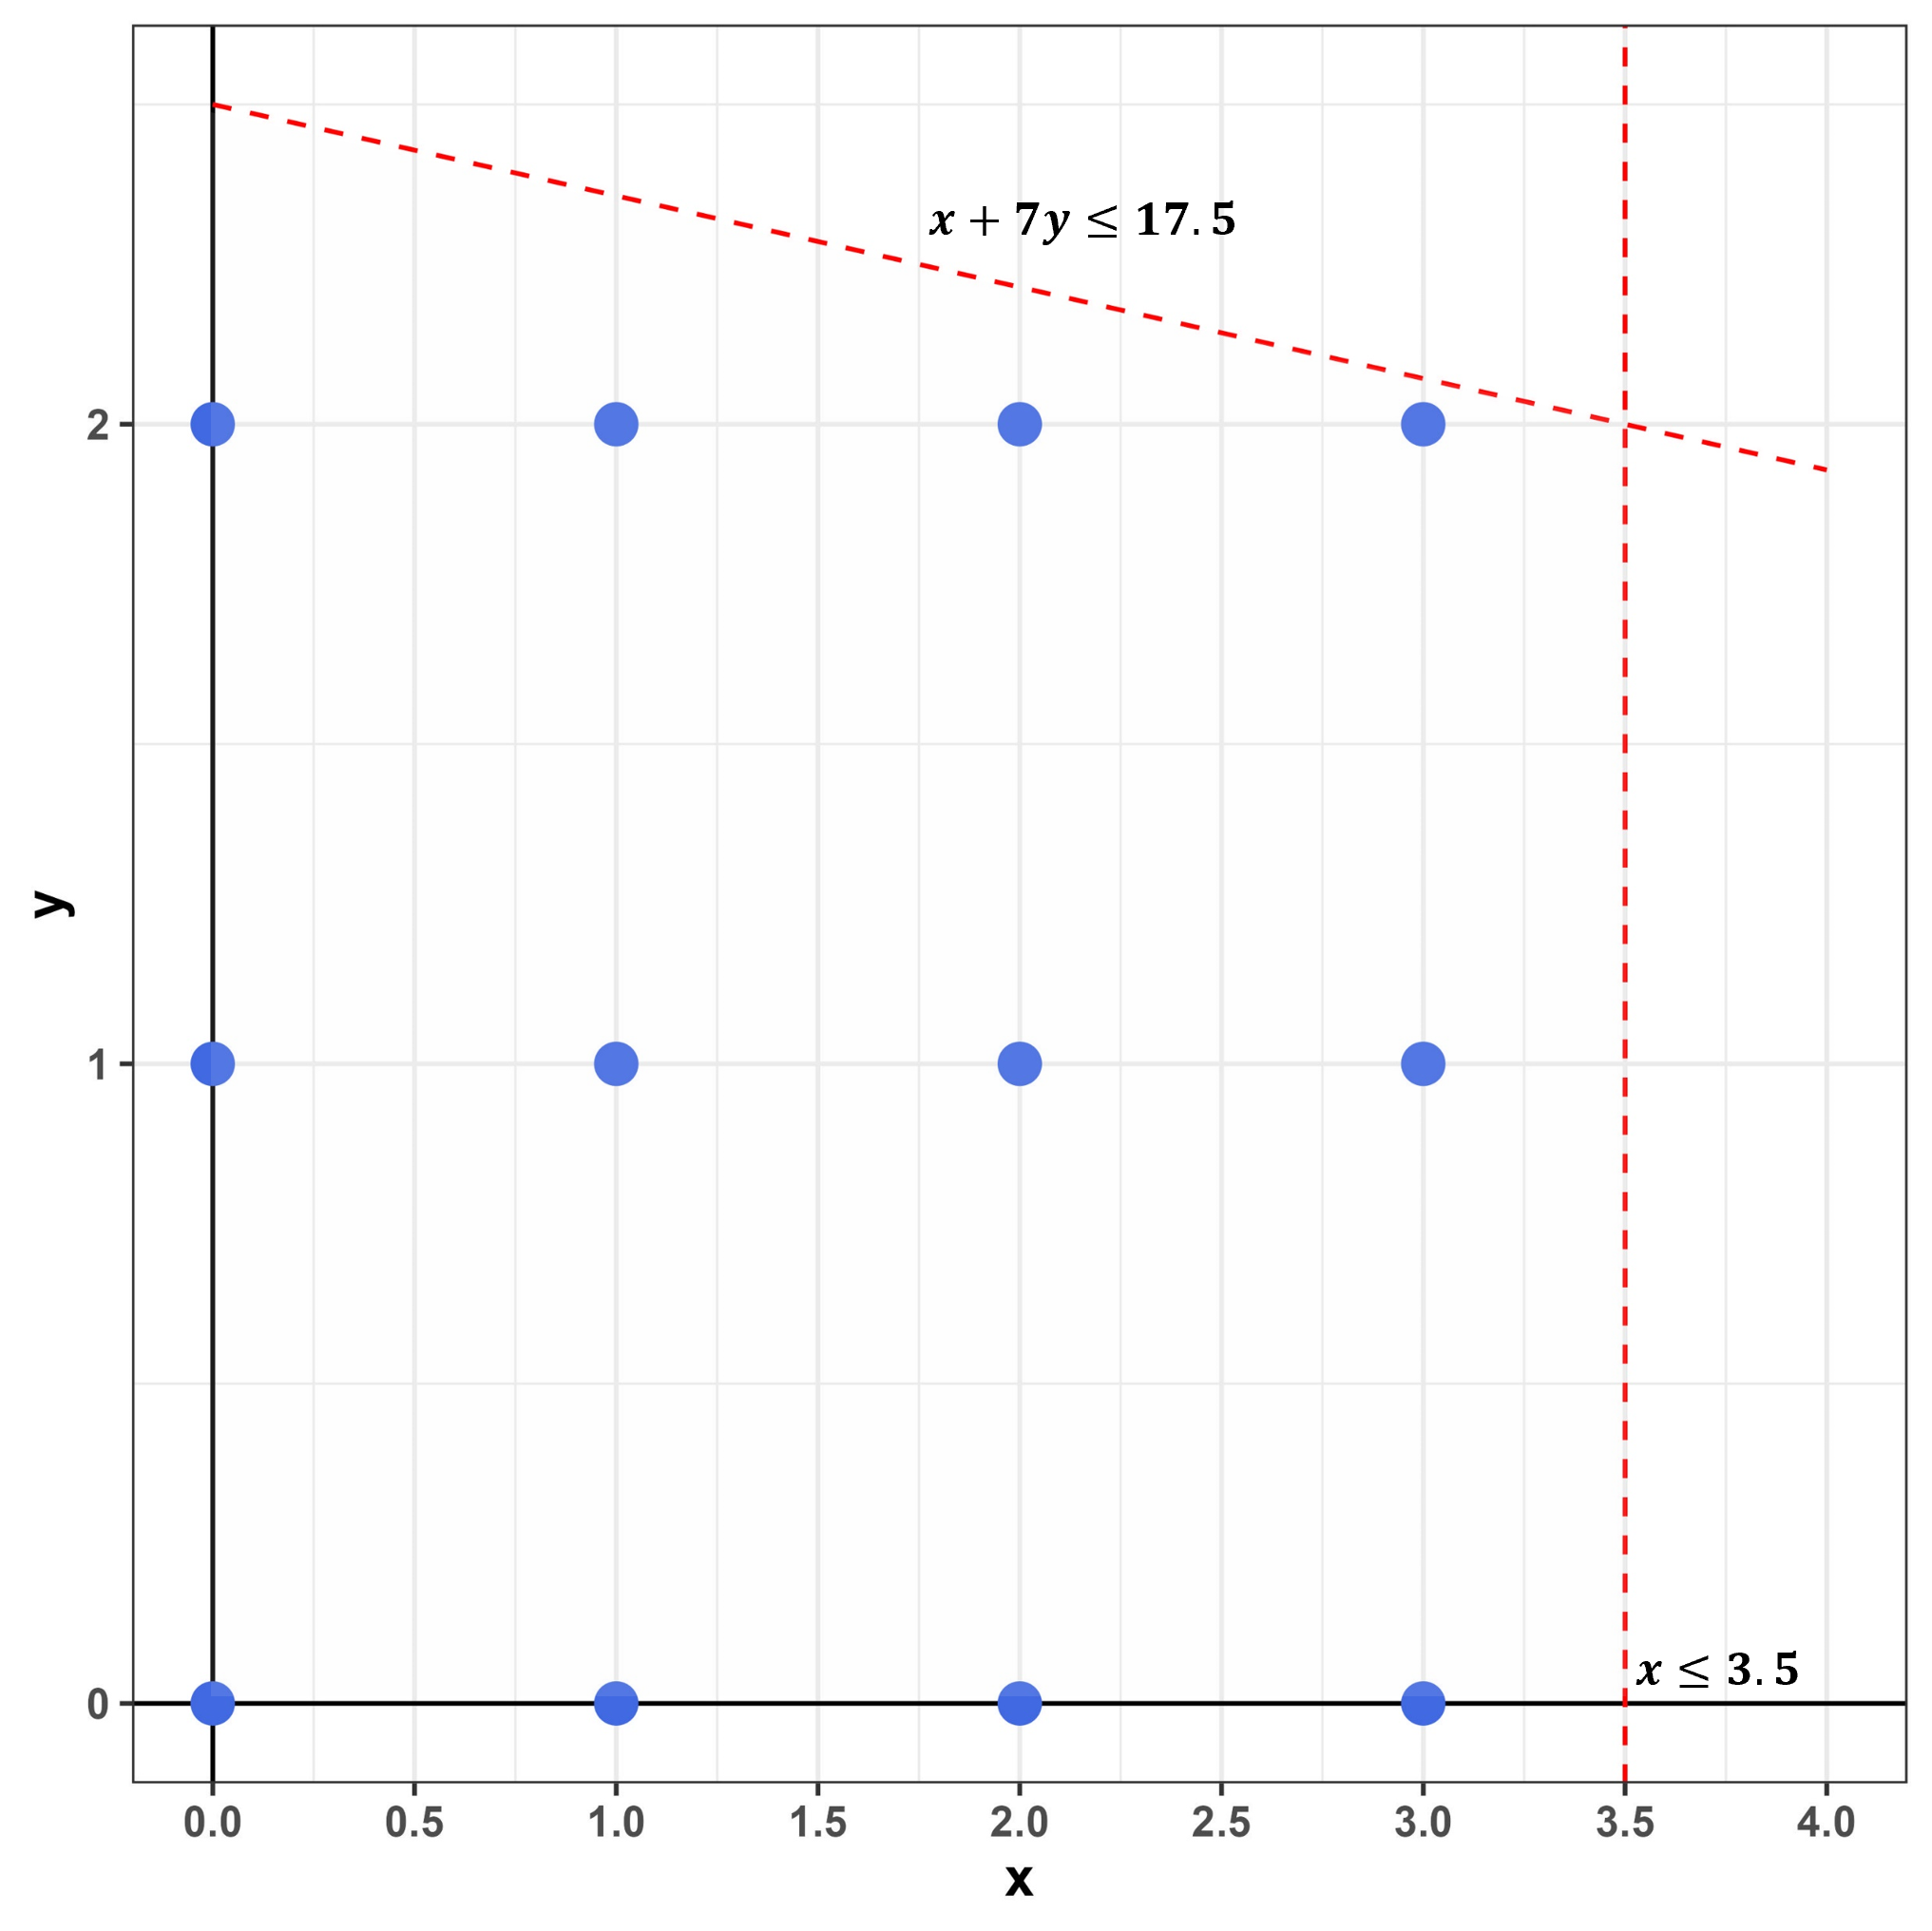

In [8]:
Image(filename="D:\\Dropbox\\1. 학교과제\\2023년\\LG 실습교육\\Material\\Figure 2.png", width = 500, height = 500)

##### 2.1 MLP 솔버 선언       
- 솔버: SCIP (SCIP: 혼합정수계획법 솔버)

In [9]:
solver = pywraplp.Solver.CreateSolver('SAT')
solver

<ortools.linear_solver.pywraplp.Solver; proxy of <Swig Object of type 'operations_research::MPSolver *' at 0x000002BDBBA8B240> >

##### 2.2 변수 생성    
- $x$, $y$는 정수 (integer non-negative)임을 정의

In [10]:
infinity = solver.infinity()
x = solver.IntVar(0.0, infinity, 'x')
y = solver.IntVar(0.0, infinity, 'y')

##### 2.4 제약조건 생성    

In [11]:
solver.Add(x+7*y <= 17.5)
solver.Add(x <= 3.5)

<ortools.linear_solver.pywraplp.Constraint; proxy of <Swig Object of type 'operations_research::MPConstraint *' at 0x000002BDBBA99360> >

##### 2.5 목표함수 정의    

In [12]:
solver.Maximize(x + 10 * y)

##### 2.6 솔버 호출   

In [13]:
print(f'Solving with {solver.SolverVersion()}')
status = solver.Solve()

Solving with CP-SAT solver v9.6.2534


In [14]:
if status == pywraplp.Solver.OPTIMAL:
    print('Solution:')
    print('Objective value =', solver.Objective().Value())
    print('x =', x.solution_value())
    print('y =', y.solution_value())
else:
    print('The problem does not have an optimal solution.')

Solution:
Objective value = 23.0
x = 3.0
y = 2.0


##### 3. 응용 문제 풀이 - 작업자 배정 문제 1      

- 목적: 총 비용 최소화
- 제약조건: 각 작업자를 최대 1개의 작업에 할당하고, 두 명의 작업자의 작업 중복상황 방지    

| Worker | Task 0 | Task 1 | Task 2 | Task 3 |
| ------ | ------ | ------ | ------ | ------ |
| 0      | 90     | 80     | 75     | 70     |
| 1      | 35     | 85     | 55     | 65     |
| 2      | 125    | 95     | 90     | 95     |
| 3      | 45     | 110    | 95     | 115    |
| 4      | 50     | 100    | 90     | 100    |

##### 3.1 데이터 만들기    

In [15]:
costs = [
    [90, 80, 75, 70],
    [35, 95, 55, 65],
    [125, 95, 90, 95],
    [45, 110, 95, 115],
    [50, 100, 90, 100]
]

num_workers = len(costs)
num_tasks = len(costs[0])

##### 3.2 MIP 솔버 선언      
- 솔버: SCIP (SCIP: 혼합정수계획법 솔버)

In [16]:
solver = pywraplp.Solver.CreateSolver('SCIP')
solver

<ortools.linear_solver.pywraplp.Solver; proxy of <Swig Object of type 'operations_research::MPSolver *' at 0x000002BDBBCB06F0> >

##### 3.3 변수 생성    
- Binary 변수로 정의    
- 0: 작업할당 x 1: 작업할당    

In [17]:
x = {}
for i in range(num_workers):
    for j in range(num_tasks):
        x[i, j] = solver.IntVar(0, 1, '')

##### 3.4 제약조건 생성     
- 제약조건 1: 각 작업자는 최소 1개 이상의 작업 할당      
- 제약조건 2: 각 작업은 두명 이상의 작업자에게 할당될 수 없음     

In [18]:
# Constraint 1  
for i in range(num_workers):
    solver.Add(solver.Sum([x[i, j] for j in range(num_tasks)]) <= 1)

In [19]:
# Constraint 2  
for j in range(num_tasks):
    solver.Add(solver.Sum([x[i, j] for i in range(num_workers)]) == 1)

##### 3.5 목표함수 정의   

In [20]:
objective_terms = [] 
for i in range(num_workers):
    for j in range(num_tasks):
        objective_terms.append(costs[i][j] * x[i, j])
solver.Minimize(solver.Sum(objective_terms))

##### 3.6 솔버 호출    

In [21]:
status = solver.Solve()

##### 3.7 최적값 출력

In [22]:
if status == pywraplp.Solver.OPTIMAL or status == pywraplp.Solver.FEASIBLE:
    print(f'Total cost = {solver.Objective().Value()}\n')
    for i in range(num_workers):
        for j in range(num_tasks):
            if x[i, j].solution_value() > 0.5:
                print(f'Worker {i} assigned to task {j}.' +
                      f' Cost: {costs[i][j]}')
else:
    print('No solution found.')

Total cost = 265.0

Worker 0 assigned to task 3. Cost: 70
Worker 1 assigned to task 2. Cost: 55
Worker 2 assigned to task 1. Cost: 95
Worker 3 assigned to task 0. Cost: 45


##### 4. 응용 문제 풀이 - 작업자 배정 문제 2        

- 목적: 총 비용 최소화
- 제약조건 1: 각 작업자를 최소 1개, 최대 3개 작업에 할당     
- 제약조건 2: 각 작업은 최소 1명의 작업자에게만 할당이 되어야 함   

| Worker | Task 0 | Task 1 | Task 2 | Task 3 | Task 4 | Task 5 | Task 6 | Task 7 | Task 8 | Task 9 |
| ------ | ------ | ------ | ------ | ------ | ------ | ------ | ------ | ------ | ------ | ------ |
| 0      | 90     | 80     | 75     | 100    | 100    | 140    | 120    | 35     | 210    | 130    |
| 1      | 65     | 35     | 55     | 165    | 120    | 55     | 40     | 45     | 180    | 220    |
| 2      | 225    | 45     | 90     | 55     | 140    | 100    | 60     | 15     | 140    | 100    |
| 3      | 35     | 20     | 95     | 315    | 50     | 80     | 80     | 35     | 100    | 60     |
| 4      | 10     | 150    | 90     | 120    | 40     | 200    | 90     | 95     | 300    | 50     |

##### 4.1 데이터 만들기

In [23]:
costs = [
    [90, 80, 75, 100, 100, 140, 120, 35, 210, 130],
    [65, 35, 55, 165, 120, 55, 40, 45, 180, 220],
    [225, 45, 90, 55, 140, 100, 60, 15, 140, 100],
    [35, 20, 95, 315, 50, 80, 80, 35, 100, 60],
    [10, 150, 90, 120, 40, 200, 90, 95, 300, 50]    
]

num_workers = len(costs)
num_tasks = len(costs[0])

##### 4.2 MIP 솔버 선언

In [24]:
solver = pywraplp.Solver.CreateSolver('SCIP')
solver

<ortools.linear_solver.pywraplp.Solver; proxy of <Swig Object of type 'operations_research::MPSolver *' at 0x000002BDBBCBA480> >

##### 4.3 변수 생성

In [25]:
x = {}
for i in range(num_workers):
    for j in range(num_tasks):
        x[i, j] = solver.IntVar(0, 1, '')

##### 4.4 제약조건 생성

In [26]:
# Constraint 1  
for i in range(num_workers):
    solver.Add(solver.Sum([x[i, j] for j in range(num_tasks)]) <= 3)
    solver.Add(solver.Sum([x[i, j] for j in range(num_tasks)]) >= 1)

In [27]:
# Constraint 2  
for j in range(num_tasks):
    solver.Add(solver.Sum([x[i, j] for i in range(num_workers)]) == 1)

##### 4.5 목적함수 정의

In [28]:
objective_terms = [] 
for i in range(num_workers):
    for j in range(num_tasks):
        objective_terms.append(costs[i][j] * x[i, j])
solver.Minimize(solver.Sum(objective_terms))

##### 4.6 솔버 호출

In [29]:
status = solver.Solve()

##### 4.7 최적값 출력

In [30]:
if status == pywraplp.Solver.OPTIMAL or status == pywraplp.Solver.FEASIBLE:
    print(f'Total cost = {solver.Objective().Value()}\n')
    for i in range(num_workers):
        for j in range(num_tasks):
            if x[i, j].solution_value() > 0.5:
                print(f'Worker {i} assigned to task {j}.' +
                      f' Cost: {costs[i][j]}')
else:
    print('No solution found.')

Total cost = 460.0

Worker 0 assigned to task 7. Cost: 35
Worker 1 assigned to task 2. Cost: 55
Worker 1 assigned to task 5. Cost: 55
Worker 1 assigned to task 6. Cost: 40
Worker 2 assigned to task 3. Cost: 55
Worker 3 assigned to task 1. Cost: 20
Worker 3 assigned to task 8. Cost: 100
Worker 4 assigned to task 0. Cost: 10
Worker 4 assigned to task 4. Cost: 40
Worker 4 assigned to task 9. Cost: 50


##### 6. 응용 문제 풀이 - 작업자 배정 문제 4

- 목적: 총 비용 최소화
- 제약조건 1: 각 작업자를 최소 1개, 최대 3개 작업에 할당     
- 제약조건 2: 각 작업은 최소 1명의 작업자에게만 할당이 되어야 함   
- 제약조건 3: 작업자는 2개의 팀으로 분할되며, 각 팀은 최소 2개 이상 최대 7개 이하까지 작업할당이 가능

| Worker | Team   | Task 0 | Task 1 | Task 2 | Task 3 | Task 4 | Task 5 | Task 6 | Task 7 | Task 8 | Task 9 |
| ------ | ------ | ------ | ------ | ------ | ------ | ------ | ------ | ------ | ------ | ------ | ------ |
| 0      | Team 1 | 90     | 80     | 75     | 100    | 100    | 140    | 120    | 35     | 210    | 130    |
| 1      | Team 1 | 65     | 35     | 55     | 165    | 120    | 55     | 40     | 45     | 180    | 220    |
| 2      | Team 1 | 225    | 45     | 90     | 55     | 140    | 100    | 60     | 15     | 140    | 100    |
| 3      | Team 2 | 35     | 20     | 95     | 315    | 50     | 80     | 80     | 35     | 100    | 60     |
| 4      | Team 2 | 10     | 150    | 90     | 120    | 40     | 200    | 90     | 95     | 300    | 50     |
| 5      | Team 2 | 80     | 40     | 100    | 30     | 70     | 150    | 30     | 15     | 400    | 90     |

##### 6.1 데이터 생성

In [76]:
costs = [
    [90, 80, 75, 100, 100, 140, 120, 35, 210, 130],
    [65, 35, 55, 165, 120, 55, 40, 45, 180, 220],
    [225, 45, 90, 55, 140, 100, 60, 15, 140, 100],
    [35, 20, 95, 315, 50, 80, 80, 35, 100, 60],
    [10, 150, 90, 120, 40, 200, 90, 95, 300, 50],
    [80, 40, 100, 30, 70, 150, 30, 15, 400, 90]
]

num_workers = len(costs)
num_tasks = len(costs[0])

team1 = [0, 1, 2]
team2 = [3, 4, 5]
team_min = 4
team_max = 7

##### 6.2 MIP 솔버 선언

In [77]:
solver = pywraplp.Solver.CreateSolver('SCIP')

##### 6.3 변수 생성

In [78]:
x = {}
for worker in range(num_workers):
    for task in range(num_tasks):
        x[worker, task] = solver.BoolVar(f'x[{worker},{task}]')

##### 6.4 제약조건 추가

In [79]:
# Constraint 1
for worker in range(num_workers):
    solver.Add(solver.Sum([x[worker, task] for task in range(num_tasks)]) >= 1)
    solver.Add(solver.Sum([x[worker, task] for task in range(num_tasks)]) <= 3)
    
    
# Constraint 2
for task in range(num_tasks):
    solver.Add(solver.Sum([x[worker, task] for worker in range(num_workers)]) == 1)
    
# Constraint 3
team1_tasks = []
for worker in team1:
    for task in range(num_tasks):
        team1_tasks.append(x[worker, task])
solver.Add(solver.Sum(team1_tasks) >= team_min)
solver.Add(solver.Sum(team1_tasks) <= team_max)


team2_tasks = []
for worker in team2:
    for task in range(num_tasks):
        team2_tasks.append(x[worker, task])
solver.Add(solver.Sum(team2_tasks) >= team_min)
solver.Add(solver.Sum(team2_tasks) <= team_max)

<ortools.linear_solver.pywraplp.Constraint; proxy of <Swig Object of type 'operations_research::MPConstraint *' at 0x000002B52B21CD20> >

##### 6.5 목적함수 정의

In [80]:
objective_terms = []
for worker in range(num_workers):
    for task in range(num_tasks):
        objective_terms.append(costs[worker][task] * x[worker, task])
solver.Minimize(solver.Sum(objective_terms))

##### 6.6 솔버 호출

In [81]:
status = solver.Solve()

##### 6.7 최적값 출력

In [82]:
if status == pywraplp.Solver.OPTIMAL or status == pywraplp.Solver.FEASIBLE:
    print(f'Total cost = {solver.Objective().Value()}\n')
    for worker in range(num_workers):
        for task in range(num_tasks):
            if x[worker, task].solution_value() > 0.5:
                print(f'Worker {worker} assigned to task {task}.' +
                      f' Cost = {costs[worker][task]}')
else:
    print('No solution found.')
print(f'Time = {solver.WallTime()} ms')

Total cost = 435.0

Worker 0 assigned to task 2. Cost = 75
Worker 1 assigned to task 5. Cost = 55
Worker 1 assigned to task 6. Cost = 40
Worker 2 assigned to task 7. Cost = 15
Worker 3 assigned to task 1. Cost = 20
Worker 3 assigned to task 8. Cost = 100
Worker 4 assigned to task 0. Cost = 10
Worker 4 assigned to task 4. Cost = 40
Worker 4 assigned to task 9. Cost = 50
Worker 5 assigned to task 3. Cost = 30
Time = 5317 ms
